In [1]:
!pip install pandas-datareader

In [108]:

import pandas as pd
from datetime import datetime

In [109]:
df = pd.read_csv('TSLA.csv')

In [110]:
df.set_index("Date", inplace = True)

<AxesSubplot:xlabel='Date'>

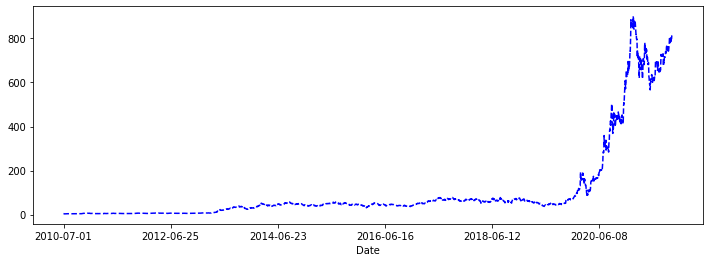

In [111]:
df['High'].plot(figsize=(12,4),c='blue',ls='--')

In [112]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...
2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000


In [113]:
df_slice= df.loc['2020-01-01':'2021-09-01']

<AxesSubplot:xlabel='Date'>

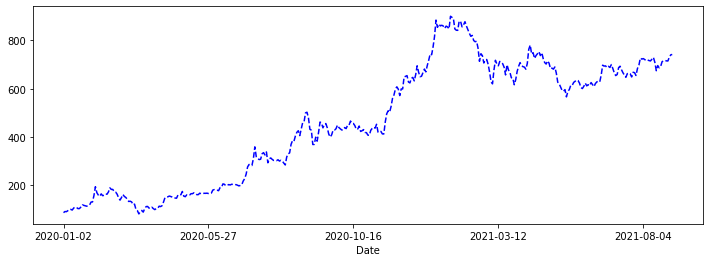

In [114]:
df_slice['High'].plot(figsize=(12,4),c='blue',ls='--')

In [115]:
index = df_slice.index
share_open = df_slice['Open']

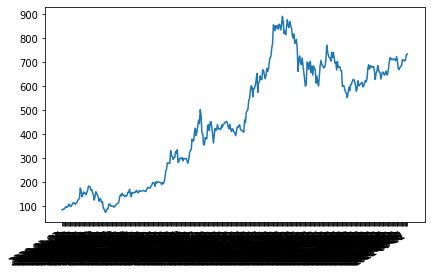

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
figure,axes = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axes.plot(index,share_open)

In [117]:
 df.reset_index(inplace=True)

In [118]:
df['Date']=pd.to_datetime(df['Date'])


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Open       2843 non-null   float64       
 2   High       2843 non-null   float64       
 3   Low        2843 non-null   float64       
 4   Close      2843 non-null   float64       
 5   Adj Close  2843 non-null   float64       
 6   Volume     2843 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.6 KB


In [124]:
df = df.set_index('Date',drop=True)

<AxesSubplot:xlabel='Date'>

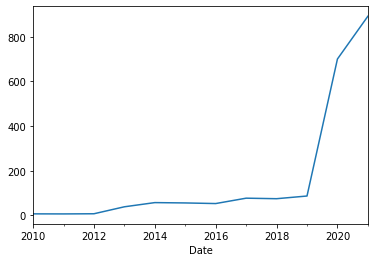

In [127]:
#yearwise sampling : A, quarterly: QS, business year : BA, monthly: M
df.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

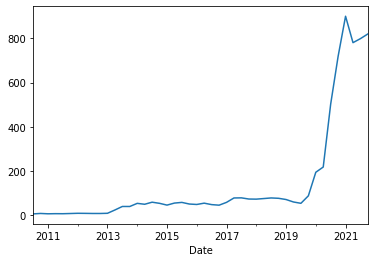

In [128]:
df.resample(rule='QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

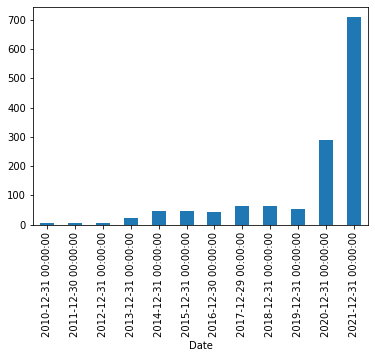

In [130]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

In [132]:
df['High'].rolling(10).mean().head(20) #window size=10

Date
2010-07-01       NaN
2010-07-02       NaN
2010-07-06       NaN
2010-07-07       NaN
2010-07-08       NaN
2010-07-09       NaN
2010-07-12       NaN
2010-07-13       NaN
2010-07-14       NaN
2010-07-15    3.9886
2010-07-16    3.8962
2010-07-19    3.8792
2010-07-20    3.9162
2010-07-21    4.0016
2010-07-22    4.0762
2010-07-23    4.1494
2010-07-26    4.2180
2010-07-27    4.2688
2010-07-28    4.2838
2010-07-29    4.2714
Name: High, dtype: float64

In [133]:
df['Open_30days_rolling'] = df['Open'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

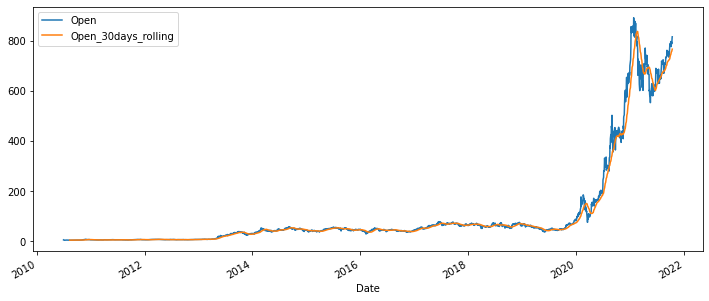

In [137]:
df[['Open','Open_30days_rolling']].plot(figsize=(12,5))

In [138]:
df['Open_30days_rolling_period_1'] = df['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

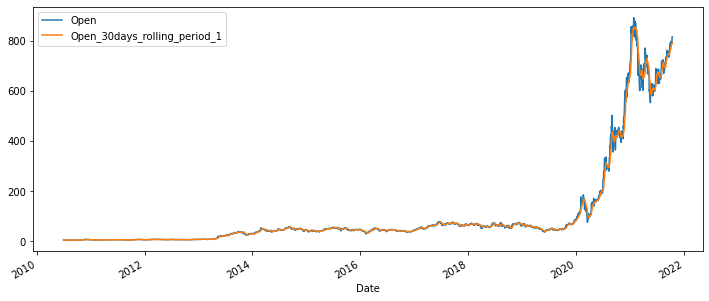

In [139]:
df[['Open','Open_30days_rolling_period_1']].plot(figsize=(12,5))

# Why do we need smoothning curve?
The different usecases have different uses. In stock market, smoothning will help in advance buy and sell situation.


<AxesSubplot:xlabel='Date'>

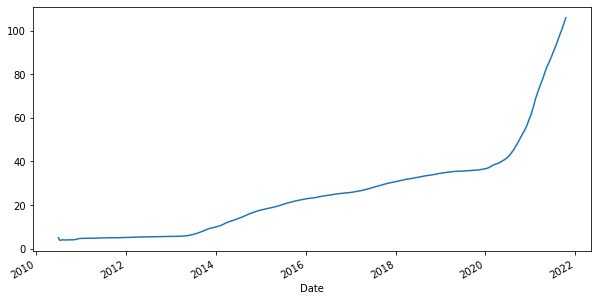

In [142]:
#cummulative rolling average
df['Open'].expanding().mean().plot(figsize=(10,5))

In [143]:
#Exponential weighted moving average
df['EMA_5days'] = df['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

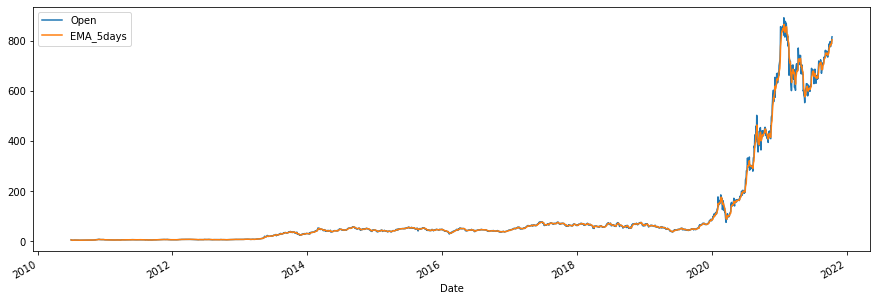

In [144]:
df[['Open','EMA_5days']].plot(figsize=(15,5))

# Where to use?
For traders who trade intraday and fast-moving markets, the EMA is more applicable. Quite often, traders use EMAs to determine a trading bias.